# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


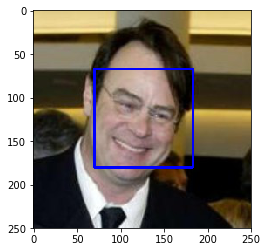

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)
- 98% of 100 files in human_files have a detected human face
- 17% of 100 files in dog_files have a detected human face

In [4]:
from tqdm import tqdm
from typing import Callable

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

#Function to test percentage of images that detect a human face
def test_images(img_path_array: np.ndarray, func: Callable) -> int:
    
    img_array_length = len(img_path_array)
    num_images_with_humans = 0
    
    # test every image in img_path_array and incerement number of images with humans
    # tqdm over the range gives us the progress of a for loop
    for i in tqdm(range(img_array_length)):
        if func(img_path_array[i]) == True:
            num_images_with_humans += 1 
    
    # Calculate percentage of images with humans
    pct_images_with_humans =  num_images_with_humans / img_array_length * 100
    
    return pct_images_with_humans

human_images_pct = test_images(human_files_short, face_detector)
dog_images_pct = test_images(dog_files_short, face_detector)

print("Human Images: Percentage with human faces detected: {} %".format(human_images_pct))
print("Dog Images: Percentage with human faces detected: {} %".format(dog_images_pct))    

100%|██████████| 100/100 [00:30<00:00,  3.32it/s]

Human Images: Percentage with human faces detected: 98.0 %
Dog Images: Percentage with human faces detected: 17.0 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path, model = VGG16):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        model: specifies which model to use. VGG16 by default
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    model.eval()
    
    # Create a Normalization transformer
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    
    # Preprocessing steps to resize, crop, convert to tensor and normalize input image
    preprocess = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            normalize
        ])

    # read image
    img =Image.open(img_path)
    # preprocess image
    img_tensor = preprocess(img)
    # add dimension
    img_tensor = torch.unsqueeze(img_tensor,0)
    # predict output class
    if use_cuda:
        index = model(img_tensor.cuda()).argmax()
        # convert output clas to integer
        index = int(index.cpu())
    else:
        index = model(img_tensor).argmax()
        # convert output clas to integer
        index = int(index)
    
    return index # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path, model):
    ## TODO: Complete the function.
    if VGG16_predict(img_path, model) in range(151, 269):
        return True
    
    return False # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
- 0.0 percentage of human images have a detected dog
- 100.0 percentage of dog images have a detected dog

In [9]:
def test_image_predictons(img_path_array: np.ndarray, func: Callable, model: str = VGG16) -> int:
    
    img_array_length = len(img_path_array)
    num_images_with_humans = 0
    
    # test every image in img_path_array and incerement number of images with humans
    # tqdm over the range gives us the progress of a for loop
    for i in tqdm(range(img_array_length)):
        if func(img_path_array[i], model) == True:
            num_images_with_humans += 1 
    
    # Calculate percentage of images with humans
    pct_images_with_humans =  num_images_with_humans / img_array_length * 100
    
    return pct_images_with_humans

In [10]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_images_pct_1 = test_image_predictons(human_files_short, dog_detector, VGG16)
dog_images_pct_1 = test_image_predictons(dog_files_short, dog_detector, VGG16)

print("Human Images: {} percentage of human images have a detected dog".format(human_images_pct_1))
print("Dog Images: {} percentage of dog images have a detected dog".format(dog_images_pct_1)) 

100%|██████████| 100/100 [00:04<00:00, 22.13it/s]

Human Images: 0.0 percentage of human images have a detected dog
Dog Images: 100.0 percentage of dog images have a detected dog


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [11]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

# define VGG16 model
RESNET_18 = models.resnet18(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    RESNET_18 = RESNET_18.cuda()

## Test resent_18 model

__Answer with resent_18 model:__ 
- 0.0 percentage of human images have a detected dog
- 99.0 percentage of dog images have a detected dog


In [12]:
human_images_pct_1 = test_image_predictons(human_files_short, dog_detector, RESNET_18)
dog_images_pct_1 = test_image_predictons(dog_files_short, dog_detector, RESNET_18)

print("Human Images: {} percentage of human images have a detected dog".format(human_images_pct_1))
print("Dog Images: {} percentage of dog images have a detected dog".format(dog_images_pct_1)) 

100%|██████████| 100/100 [00:02<00:00, 38.91it/s]

Human Images: 0.0 percentage of human images have a detected dog
Dog Images: 99.0 percentage of dog images have a detected dog


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [13]:
import os
from torchvision import datasets
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

train_location = "/data/dog_images/train"
valid_location = "/data/dog_images/valid"
test_location = "/data/dog_images/test"

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    
# Preprocessing steps to resize, crop, convert to tensor and normalize input image
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        normalize
    ])

train_data = datasets.ImageFolder(train_location,preprocess)
valid_data = datasets.ImageFolder(valid_location,preprocess)
test_data = datasets.ImageFolder(test_location,preprocess)

# number of images to be used in one training iteration
batch_size = 20

# number of sub-processes to be used for data loading
num_workers = 0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
    num_workers=num_workers)

loaders_scratch = {"train": train_loader,"valid":valid_loader, "test":test_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
- I am resizing the images to a size of 256 first
- I then crop them at random using a RandomResizedCrop which crops the image to a random size and chooses a random aspect ratio and finally resizes to the standard size of 224
- I chose a initial size of 256 and a cropped size of 224 which are commonly picked sizes in image clasification with CNNs
- I chose to augment the dataset by:
    - using a RandomHorizontalFlip which flips the images at random with a probability of 0.5 so that we can learn images where dogs face either left or right and
    - using a RandomRotation with 10 degrees so that we can learn images with slight tilts in them

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [14]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN

        self.conv1 = nn.Conv2d(3, 32, 3, stride=2, padding=1)      
        self.conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        
        # max pooling layer, to down-sample an input representation
        # nn.MaxPool2d(kernel_size, stride)
        self.pool = nn.MaxPool2d(2, 2)
        
        # fully-connected
        self.fc1 = nn.Linear(7*7*128, 512)
        self.fc2 = nn.Linear(512, 133) 
        
        # drop-out
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        ## Define forward behavior
        
        # Input shape 224
        # Layer 1 - Conv + Max Pool
        x = F.relu(self.conv1(x)) # shape 112
        x = self.pool(x) # shape 56
        
        # Layer 2 - Conv + Max Pool
        x = F.relu(self.conv2(x)) # shape 28
        x = self.pool(x) # size 14
        
        # Layer 3 - Conv + Max Pool
        x = F.relu(self.conv3(x)) # shape 14
        x = self.pool(x) # shape 7
        
        # Flatten + Dropout
        # -1 means inferring the size from other dimensions.
        x = x.view(x.size(0), -1) # or x = x.view(-1, 7*7*128)
        x = self.dropout(x)
        
        # Layer 4 - Linear + Dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        
        # Layer 5 - Linear
        x = self.fc2(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
- Dog Breed classification is a complex process and hence I have decided to use 3 layers of convolution to better capture the nuances of the dog breed images
- I have followed the convolution layers by flattening and 2 Linear layers to get to the desired output layer size of 133 which corresponds to the number of dog breeds in our images
- Each convolution layer is followed by a max pooling layer where I use a stride of 2 which makes the height and width of the image vectors half of the previous layer
- Before the two linear layers I use dropout layers which drops out 25% of the nodes and reduces overfitting
- I have used ReLU as the activation function which replaces a negative pixel value with 0. This makes the network sparse and also speeds up the process
- I use CrossEntropyLoss as my loss function as it combines the best of Softmax and Negative Log Loss and is useful in training a classification problem with C classes.
- I chose Adam as the optimization algorithm as it is proven to be very effective for many different neural networks of a very wide variety of architectures. 
- My learning rate choice was was on the lower side - 0.001 which I believed would help the model in learning the intricacies of dog breeds
- I initialy decided to train my model for 50 epochs to help it learn the many intricacies of dog breeds better and reduce validation loss, 
    - But as the notebook stopped due to inactivity after 40 epochs I trained the model for another 40 epochs after restarting the kernel. 
    - So, the model has been trained for 80 epochs in total and learned quite a bit about dog breeds to lower the validation loss, 
    - However looking at the validation loss, training till 50 epochs seems to have been suffcient when it got saved last and its this 50 epochs trained model that I am finaly using

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [15]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [16]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss wrt model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update running training loss
            train_loss += loss.item() * data.size(0)
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # update validation loss
            valid_loss += loss.item() * data.size(0)
            
        # calculate average losses
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [22]:
# train the model
model_scratch = train(40, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# code you want to evaluate

Epoch: 1 	Training Loss: 3.261057 	Validation Loss: 3.683897
Validation loss decreased (inf --> 3.683897).  Saving model ...
Epoch: 2 	Training Loss: 3.225686 	Validation Loss: 3.677902
Validation loss decreased (3.683897 --> 3.677902).  Saving model ...
Epoch: 3 	Training Loss: 3.222605 	Validation Loss: 3.796497
Epoch: 4 	Training Loss: 3.205301 	Validation Loss: 3.759359
Epoch: 5 	Training Loss: 3.193285 	Validation Loss: 3.669217
Validation loss decreased (3.677902 --> 3.669217).  Saving model ...
Epoch: 6 	Training Loss: 3.164769 	Validation Loss: 3.693919
Epoch: 7 	Training Loss: 3.179987 	Validation Loss: 3.643604
Validation loss decreased (3.669217 --> 3.643604).  Saving model ...
Epoch: 8 	Training Loss: 3.140538 	Validation Loss: 3.608123
Validation loss decreased (3.643604 --> 3.608123).  Saving model ...
Epoch: 9 	Training Loss: 3.171474 	Validation Loss: 3.703102
Epoch: 10 	Training Loss: 3.166643 	Validation Loss: 3.629979
Epoch: 11 	Training Loss: 3.129941 	Validation Lo

In [23]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss += ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [24]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))


# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.679644


Test Accuracy: 16% (138/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [25]:
## TODO: Specify data loaders
# Using the same data loaders from the previous step
# print size of loaders
print(len(train_loader))
print(len(valid_loader))
print(len(test_loader))

334
42
42


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [26]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)

# Freeze parameters so we don't backprop through them
for param in model_transfer.parameters():
    param.requires_grad = False

# Replace the last fully connected layer with a Linnear layer with 133 out features
model_transfer.fc = nn.Linear(2048, 133)

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
- RESNET is a ground breaking model in image classification which was one of the first CNN models after VGG that performed really well in image classification of ImageNet data
- Since we are predicting dog breeds which were also used in ImageNet data, RESNET50 comes as a natural choice for a tarnsfer learning model
- The output layer of the model has been modified to a size of 133 as that is the number of dog breeds we are attempting to predict
- I use CrossEntropyLoss as my loss function as it combines the best of Softmax and Negative Log Loss and is useful in training a classification problem with C classes.
- I chose Adam as the optimization algorithm as it is proven to be very effective for many different neural networks of a very wide variety of architectures.
- My learning rate choice was was on the lower side - 0.001 which I believed would help the model in learning the intricacies of dog breeds
- I also decided to train my trasfer model for 25 epochs to help it learn the many intricacies of dog breeds better and reduce validation loss
    - But as the notebook stopped due to inactivity after 10 epochs I trained the model for another 25 epochs after restarting the kernel. 
    - So, the model has been trained for 35 epochs in total and learned quite a bit about dog breeds to lower the validation loss, 
    - However looking at the validation loss, training till 13 epochs seems to have been suffcient when it got saved last and its this 13 epochs trained model that I am finaly using

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [27]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [28]:
# train the model
model_transfer = train(25, loaders_scratch, model_transfer, optimizer_transfer, criterion_transfer, 
                       use_cuda, 'model_transfer.pt')

Epoch: 1 	Training Loss: 2.824278 	Validation Loss: 1.528410
Validation loss decreased (inf --> 1.528410).  Saving model ...
Epoch: 2 	Training Loss: 1.553397 	Validation Loss: 1.429199
Validation loss decreased (1.528410 --> 1.429199).  Saving model ...
Epoch: 3 	Training Loss: 1.369705 	Validation Loss: 1.158323
Validation loss decreased (1.429199 --> 1.158323).  Saving model ...
Epoch: 4 	Training Loss: 1.231644 	Validation Loss: 1.273229
Epoch: 5 	Training Loss: 1.233246 	Validation Loss: 1.377246
Epoch: 6 	Training Loss: 1.197886 	Validation Loss: 1.270484
Epoch: 7 	Training Loss: 1.169185 	Validation Loss: 1.288723
Epoch: 8 	Training Loss: 1.164367 	Validation Loss: 1.317713
Epoch: 9 	Training Loss: 1.148002 	Validation Loss: 1.289993
Epoch: 10 	Training Loss: 1.120039 	Validation Loss: 1.228562
Epoch: 11 	Training Loss: 1.119921 	Validation Loss: 1.237810
Epoch: 12 	Training Loss: 1.107778 	Validation Loss: 1.457507
Epoch: 13 	Training Loss: 1.101489 	Validation Loss: 1.333212
E

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [29]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

test(loaders_scratch, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.274586


Test Accuracy: 66% (555/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [115]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_scratch['train'].dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    
    # Open and transform the images
    image = Image.open(img_path).convert('RGB')
    prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                               transforms.ToTensor(), 
                                               transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                    std=[0.229, 0.224, 0.225])])

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = prediction_transform(image)[:3,:,:].unsqueeze(0)
    
    # CPU or GPU
    device = torch.device("cuda:0" if use_cuda else "cpu")

    # Load the trained model 'model_transfer.pt'
    model_transfer.load_state_dict(torch.load('model_transfer.pt', map_location='cpu'))
    
    # Predict Image class
    model_transfer.eval()
    idx = torch.argmax(model_transfer(image))
    
    # predicted dog breed
    predicted_breed = class_names[idx]
    
    return predicted_breed

In [145]:
# Predict dog breed with the model
predict_breed_transfer('./test_images/Welsh_springer_spaniel_08203.jpg')

'Welsh springer spaniel'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [137]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    is_dog = dog_detector(img_path, VGG16)
    is_human = face_detector(img_path)
    breed = predict_breed_transfer(img_path)
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    if is_dog:
        print("\nHello, dog!")
        plt.imshow(cv_rgb)
        plt.show()
        print("Your predicted breed is ...")
        print(breed)
    elif is_human:
        print("\nHello, human!")
        plt.imshow(cv_rgb)
        plt.show()
        print("You look like a ...")
        print(breed)
    else:
        print("\nI detect neither a dog nor a human in this image.")
        plt.imshow(cv_rgb)
        plt.show()

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

- The model performance is not entirely bad but there is definite scope for improvement. For example the model mistook the horse image for a dog
- 3 improvements that I would suggest for this model are:
    - The performance of the face detector can definitely be improved to recognized humans better
    - The dog breed classifier model has low test accuracy of 66% and can be possibly further improved by experimenting with other pre trained models like Inception and Xception
    - We can use additional dog images and use multiple augmentation techniques to increase variety of our training data helping it to recognize dogs breeds better
    - I could have used early stopping to not have trained for a large number of epochs without any benefit as the validation loss kept increasing
    - Transforming the validation and test datasets using flips, rotations and crops was perhaps unnecessary. Maybe not doing these would improve accuracy


Hello, human!


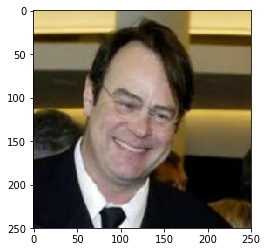

You look like a ...
Chihuahua

Hello, human!


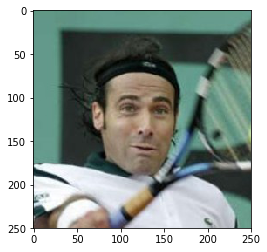

You look like a ...
Dachshund

Hello, human!


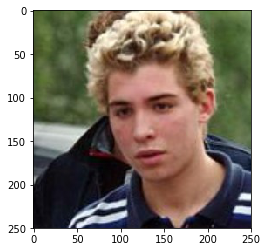

You look like a ...
English springer spaniel

Hello, dog!


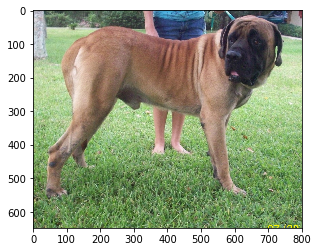

Your predicted breed is ...
Bullmastiff

Hello, dog!


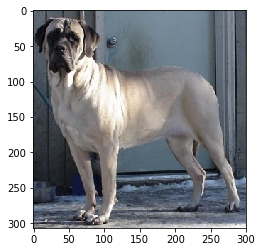

Your predicted breed is ...
Bullmastiff

Hello, dog!


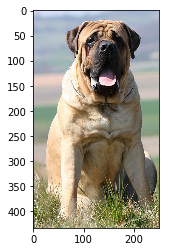

Your predicted breed is ...
Bullmastiff


In [138]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)


Hello, human!


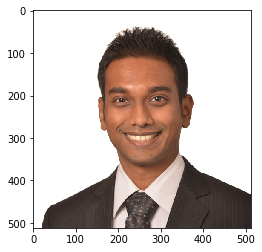

You look like a ...
Glen of imaal terrier


In [139]:
run_app("./test_images/my_image.jpg")


Hello, dog!


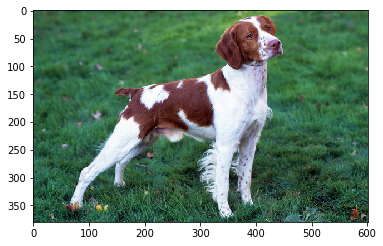

Your predicted breed is ...
Brittany


In [140]:
run_app("./test_images/brittany_image.jpg")


Hello, dog!


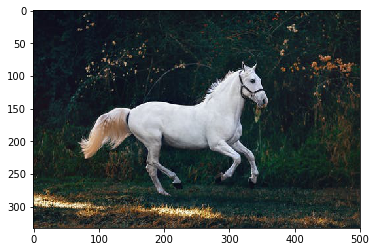

Your predicted breed is ...
Greyhound


In [141]:
run_app("./test_images/horse_image.jpeg")


Hello, human!


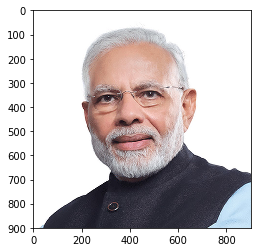

You look like a ...
Dogue de bordeaux


In [142]:
run_app("./test_images/modi_image.jpg")


Hello, dog!


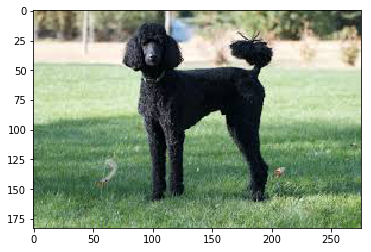

Your predicted breed is ...
Poodle


In [143]:
run_app("./test_images/poodle_image.jpg")


I detect neither a dog nor a human in this image.


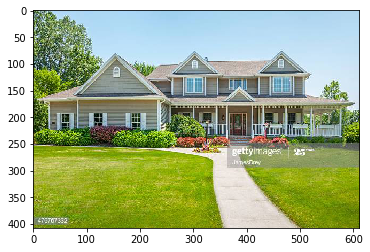

In [144]:
run_app("./test_images/house_image.jpg")